# [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) algorithms

- Clustering is an unsupervised learning technique.
- The goal is to identify groups of data points that are similar to each other.
- Types clustering algorithms:
  + distance based
  + density based
  + ...
- Real-world example: Find similarly behaving groups of customers for a web shop.

## [K-Means](https://en.wikipedia.org/wiki/K-means_clustering)

- K-Means is a distance based clustering algorithm.
- Input:
  + $x_1$, ..., $x_n \in \mathbb{R}^d$ (data points)
  + $K \in \mathbb{N}$ (number of clusters)
- Initialization: randomly generate $K$ cluster centers $c_1$, ..., $c_K$ (e.g. by randomly selecting $K$ data points).
- Loop:
  + Assign each data point to the nearest cluster center.
  + Re-compute cluster centers as the center ("mean") of cluster members.
  + If there is no change, then stop the loop.

In [1]:
import pandas as pd

# Let's load the Wisconsin Breast Cancer data set!
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
    'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('../_data/wisconsin_data.txt', sep=',', names=names, na_values='?')

# Substitute the null values in the Bare_Nuclei column!
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean(), inplace=True)

# Extract input matrix!
X = df[names[1: -1]].values
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [2]:
X.shape

(699, 9)

In [3]:
# column standard deviations
X.std(axis=0)

array([2.81372582, 3.0492756 , 2.96978617, 2.85333603, 2.21271541,
       3.59927429, 2.43661945, 3.05144882, 1.7138507 ])

**Exercise 1**: Implement K-means clustering from scratch and test it on the Wisconsin Breast Cancer data set!

In [37]:
K = 5 # number of clusters
n_iter = 100

# randomly draw K cluster centers
import numpy as np
rs = np.random.RandomState(42)
C = X[rs.permutation(X.shape[0])[:K]]

for i in range(n_iter):
    # compute nearest center for each data point
    clusters = np.array([((C - xi)**2).sum(axis=1).argmin() for xi in X])

    # re-compute cluster centers
    for k in range(K):
        C[k] = X[clusters == k].mean(axis=0)

In [38]:
clusters

array([1, 4, 1, 4, 1, 3, 0, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 4, 1, 4, 3,
       1, 4, 2, 4, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 1, 4, 4, 3, 4, 3, 4,
       3, 2, 4, 2, 1, 4, 4, 0, 4, 3, 4, 4, 3, 1, 4, 1, 4, 2, 3, 1, 2, 1,
       1, 4, 3, 2, 1, 3, 2, 4, 4, 2, 2, 1, 0, 2, 2, 1, 1, 1, 3, 3, 4, 3,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 3, 3, 4, 0, 1, 1, 3, 1, 4, 3, 2, 4,
       2, 4, 4, 3, 0, 0, 1, 3, 2, 1, 2, 1, 3, 4, 3, 2, 4, 1, 4, 2, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 4, 0, 2, 0, 4, 2, 1, 3, 2, 4, 3, 1,
       2, 4, 2, 2, 0, 3, 4, 1, 1, 0, 1, 1, 3, 3, 1, 2, 1, 2, 2, 3, 4, 3,
       2, 3, 1, 4, 2, 2, 1, 3, 4, 2, 3, 3, 3, 2, 3, 3, 1, 2, 1, 1, 4, 1,
       2, 1, 3, 4, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 1,
       2, 3, 0, 4, 4, 2, 4, 3, 2, 3, 4, 3, 1, 4, 1, 0, 3, 3, 3, 4, 1, 1,
       2, 0, 2, 1, 3, 4, 1, 0, 2, 4, 4, 3, 3, 4, 1, 1, 1, 4, 4, 3, 3, 4,
       3, 1, 4, 4, 3, 2, 4, 1, 4, 1, 1, 0, 1, 2, 2, 4, 1, 2, 4, 4, 4, 3,
       3, 1, 4, 3, 2, 2, 3, 4, 0, 4, 4, 1, 1, 4, 3,

**Exercise 2**: Visualize the clusters on a scatter plot of the data!



In [42]:
# apply t-SNE on the data matrix X
from sklearn.manifold import TSNE
Z = TSNE(random_state=42).fit_transform(X)

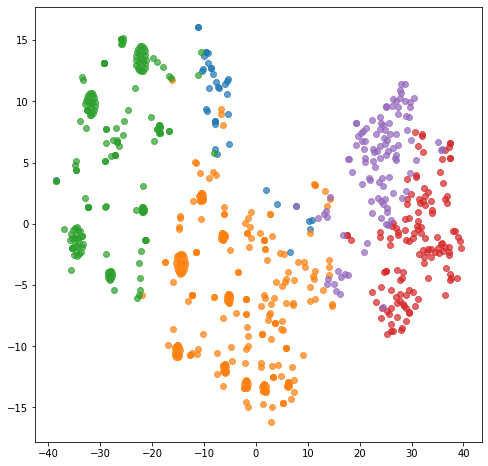

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for k in range(K):
    plt.scatter(Z[clusters == k, 0], Z[clusters == k, 1], alpha=0.7)

**Exercise 3**: Repeat the previous experiment using scikit learn's built in `KMeans` class!

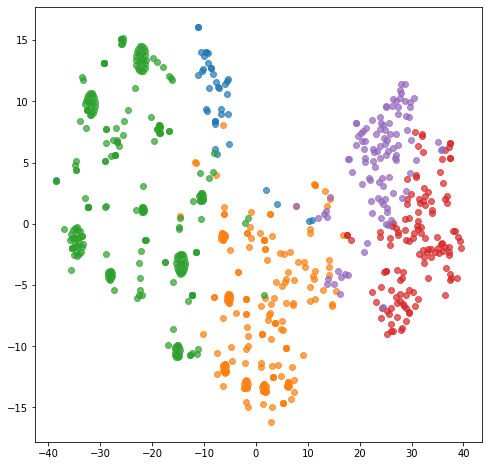

In [68]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init='random', n_init=1, random_state=42)
clusters = km.fit(X).predict(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for k in range(K):
    plt.scatter(Z[clusters == k, 0], Z[clusters == k, 1], alpha=0.7)